<h1><center>EXPERIMENT 4</center></h1>
<h3>AIM :</h3> To design a convnet for classifying dog and cat images
<br>
<h3>Thoery:</h3>
To design a convolutional neural network (convnet) for classifying dog and cat images, the following steps can be followed:

Load the dataset: The dog and cat image dataset can be downloaded from various sources, such as Kaggle, and stored in a directory structure where each class has its own folder. The tensorflow.keras.preprocessing.image module provides a function ImageDataGenerator that can be used to load and preprocess the images.

Preprocess the data: Before training the convnet, the data should be preprocessed. This includes resizing the images to a standard size (e.g., 150x150 pixels), normalizing the pixel values to a range of 0 to 1, and splitting the data into training and validation sets.

Design the model: The convnet can be designed using the tensorflow.keras API. The model should start with a convolutional layer with a small kernel size (e.g., 3x3) and a small number of filters (e.g., 32). This should be followed by a max pooling layer to reduce the spatial dimensions of the feature maps. This process of convolution and pooling can be repeated multiple times, with increasing number of filters in each layer. The final output of the convolutional layers can be flattened and fed into a fully connected (dense) layer, followed by a final output layer with 2 neurons (one for each class).

Compile the model: After designing the model, it needs to be compiled with an appropriate loss function, optimizer, and evaluation metric. Since this is a binary classification problem, binary cross-entropy can be used as the loss function, and the Adam optimizer can be used for training. The accuracy metric can be used to evaluate the performance of the model.

Train the model: The compiled model can be trained on the preprocessed training data using the model.fit() method. The number of epochs and batch size can be adjusted to optimize the performance of the model.

Evaluate the model: After training the model, its performance can be evaluated on the preprocessed validation data using the model.evaluate() method. This will provide the accuracy of the model on the validation data.

Make predictions: Finally, the trained model can be used to make predictions on new, unseen data using the model.predict() method. The predicted class can be the one with the highest probability.





In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2023-04-14 13:49:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   188MB/s    in 0.3s    

2023-04-14 13:49:35 (188 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.listdir('/tmp')

['pyright-732-aQJulZJouSRb',
 'cats_and_dogs_filtered.zip',
 'dap_multiplexer.ff827b0d1590.root.log.INFO.20230414-131418.106',
 'python-languageserver-cancellation',
 'dap_multiplexer.INFO',
 'debugger_1m37wi21wi',
 'initgoogle_syslog_dir.0',
 'pyright-732-a6U43jHmasbP',
 'cats_and_dogs_filtered']

In [ ]:
base_dir='/tmp/cats_and_dogs_filtered'

#training and validation directory
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

#training directory
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

#validation directory
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


print('Total training cat images.   ',len(os.listdir(train_cats_dir)))
print('Total training dog images.   ',len(os.listdir(train_dogs_dir)))

print('Total Validation cat images.   ',len(os.listdir(validation_cats_dir)))
print('Total Validation dog images.   ',len(os.listdir(validation_dogs_dir)))

['cat.546.jpg', 'cat.134.jpg', 'cat.435.jpg', 'cat.816.jpg', 'cat.383.jpg', 'cat.204.jpg', 'cat.465.jpg', 'cat.64.jpg', 'cat.513.jpg', 'cat.783.jpg']
['dog.939.jpg', 'dog.218.jpg', 'dog.192.jpg', 'dog.43.jpg', 'dog.791.jpg', 'dog.467.jpg', 'dog.408.jpg', 'dog.602.jpg', 'dog.14.jpg', 'dog.624.jpg']
Total training cat images.    1000
Total training dog images.    1000
Total Validation cat images.    500
Total Validation dog images.    500


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled here
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=10,
                              validation_steps=50,
                              verbose=2)

Epoch 1/10


<ipython-input-26-73665b94786d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


10/10 - 3s - loss: 0.6946 - acc: 0.5150 - val_loss: 0.6922 - val_acc: 0.5000 - 3s/epoch - 345ms/step
Epoch 2/10
10/10 - 4s - loss: 0.7237 - acc: 0.5400 - val_loss: 0.6933 - val_acc: 0.5110 - 4s/epoch - 448ms/step
Epoch 3/10
10/10 - 3s - loss: 0.6966 - acc: 0.5500 - val_loss: 0.6935 - val_acc: 0.5000 - 3s/epoch - 345ms/step
Epoch 4/10
10/10 - 3s - loss: 0.6861 - acc: 0.5700 - val_loss: 0.6930 - val_acc: 0.5000 - 3s/epoch - 346ms/step
Epoch 5/10
10/10 - 4s - loss: 0.6967 - acc: 0.5250 - val_loss: 0.6863 - val_acc: 0.5880 - 4s/epoch - 440ms/step
Epoch 6/10
10/10 - 3s - loss: 0.6871 - acc: 0.5750 - val_loss: 0.6836 - val_acc: 0.5910 - 3s/epoch - 349ms/step
Epoch 7/10
10/10 - 3s - loss: 0.6894 - acc: 0.5550 - val_loss: 0.6790 - val_acc: 0.5950 - 3s/epoch - 342ms/step
Epoch 8/10
10/10 - 4s - loss: 0.6712 - acc: 0.5750 - val_loss: 0.6783 - val_acc: 0.6160 - 4s/epoch - 399ms/step
Epoch 9/10
10/10 - 3s - loss: 0.7452 - acc: 0.6250 - val_loss: 0.6810 - val_acc: 0.5560 - 3s/epoch - 344ms/step
Epo

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]


Text(0.5, 1.0, 'Training and validation loss')

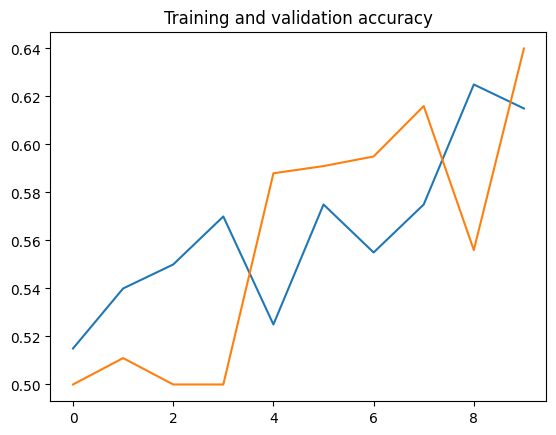

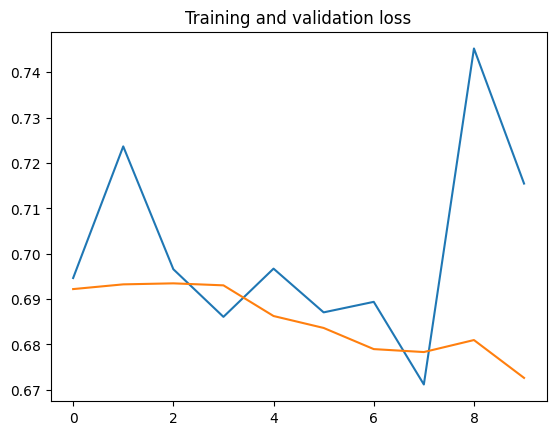

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

<h3>Conclusion:</h3>
A convnet for classifying dog and cat images is successfully implemented.